In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import mode

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('paper')
sns.set_style("ticks")

from utils.plotting import despine, cm2inch
from utils.general import make_sure_path_exists

# Descriptives

In [2]:
# directories
data_dir = '../data/'
mfx_dir = '../results/posterior_traces/mixed_effects_models/'
figure_dir = '../figures/'
results_dir = '../results/'

# make sure output dirs exist
make_sure_path_exists(figure_dir)
make_sure_path_exists(mfx_dir)

# set sizes and subjects
setsizes = np.array([9,16,25,36])
subjects = np.arange(49)
n_subjects = subjects.size

# model specifications
model_names = ['probabilistic_satisficing', 'GLAM', 'independent_accumulation']
model_names_short = ['PSM', 'GLAM', 'IAM']
gaze_biases = ['with_active_gaze', 'with_passive_gaze']

# set size colors / markers
colors = ['darkturquoise', 'orange', 'mediumseagreen', 'lightcoral']
markers = ['o', '^', 's', 'D']

# Collect individual model parameter estimates

In [3]:
estimates = dict()

for model_name in model_names:
    
    # specify model parameters
    if model_name == 'independent_accumulation':
        model_parameters = ['v', 'gamma', 'zeta', 's']
        to_round = [6, 2, 2, 4]
    elif model_name == 'GLAM':
        model_parameters = ['v', 'gamma', 'zeta', 's', 'tau']
        to_round = [6, 2, 2, 4, 2]
    elif model_name == 'probabilistic_satisficing':
        model_parameters = ['v', 'alpha', 'gamma', 'zeta', 'tau']
        to_round = [8, 8, 2, 2, 2]
    else:
        raise NameError('Invalid model name')
                
    for gaze_bias in gaze_biases:
        
        model_key = '{}_{}'.format(model_name, gaze_bias)
        estimates[model_key] = dict()
        
        for setsize in setsizes:
            
            estimates[model_key][setsize] = dict()
            for par, prec in zip(model_parameters, to_round):
                
                estimates[model_key][setsize][par] = np.zeros(subjects.size)
                
                for subject in subjects:
                    # load trace
                    tracefile = results_dir+'/posterior_traces/{}/{}_{}_mtrace.csv'.format(
                            model_key, subject, setsize)
                    
                    if os.path.isfile(tracefile):
                        subject_mtrace = pd.read_csv(tracefile)
                        estimates[model_key][setsize][par][subject] = mode(
                                np.round(subject_mtrace[par].values, prec))[0][0]
                    else:
                        print('/!\ Trace missing for {}, set size: {}, subject: {}'.format(model_key, setsize, subject))

# Figure 5-figure supplement 1






probabilistic_satisficing_with_active_gaze (set size 9): gamma, mean(sd): 0.6265306122448979(0.28468063753866557)
probabilistic_satisficing_with_active_gaze (set size 9): zeta, mean(sd): 1.2887755102040817(1.6246979407212663)
probabilistic_satisficing_with_active_gaze (set size 9): v, mean(sd): 1.2142857142857143e-07(8.896227129680151e-08)
probabilistic_satisficing_with_active_gaze (set size 9): alpha, mean(sd): 1.4635306122448979e-05(2.141150111524948e-05)
probabilistic_satisficing_with_active_gaze (set size 9): tau, mean(sd): 3.4706122448979593(1.7331643917498578)


probabilistic_satisficing_with_active_gaze (set size 16): gamma, mean(sd): 0.5273469387755102(0.266525455461568)
probabilistic_satisficing_with_active_gaze (set size 16): zeta, mean(sd): 1.726122448979592(1.5956174882094132)
probabilistic_satisficing_with_active_gaze (set size 16): v, mean(sd): 6.571428571428571e-08(5.2177092479284786e-08)
probabilistic_satisficing_with_active_gaze (set size 16): alpha, mean(sd): 2.5

independent_accumulation_with_active_gaze (set size 36): zeta, mean(sd): 0.30979591836734693(0.7190625694324871)
independent_accumulation_with_active_gaze (set size 36): v, mean(sd): 0.00017610204081632656(0.00012385166323320405)
independent_accumulation_with_active_gaze (set size 36): s, mean(sd): 0.012673469387755102(0.007754360866837739)





independent_accumulation_with_passive_gaze (set size 9): v, mean(sd): 1.8571428571428572e-05(1.2275743462251906e-05)
independent_accumulation_with_passive_gaze (set size 9): s, mean(sd): 0.014063265306122447(0.006712665271861963)


independent_accumulation_with_passive_gaze (set size 16): v, mean(sd): 1.1204081632653062e-05(1.493247329984149e-05)
independent_accumulation_with_passive_gaze (set size 16): s, mean(sd): 0.016055102040816324(0.009937828392201838)


independent_accumulation_with_passive_gaze (set size 25): v, mean(sd): 1.1122448979591837e-05(1.7224368894052905e-05)
independent_accumulation_with_passive_gaze (set size 25): s, mean(sd)

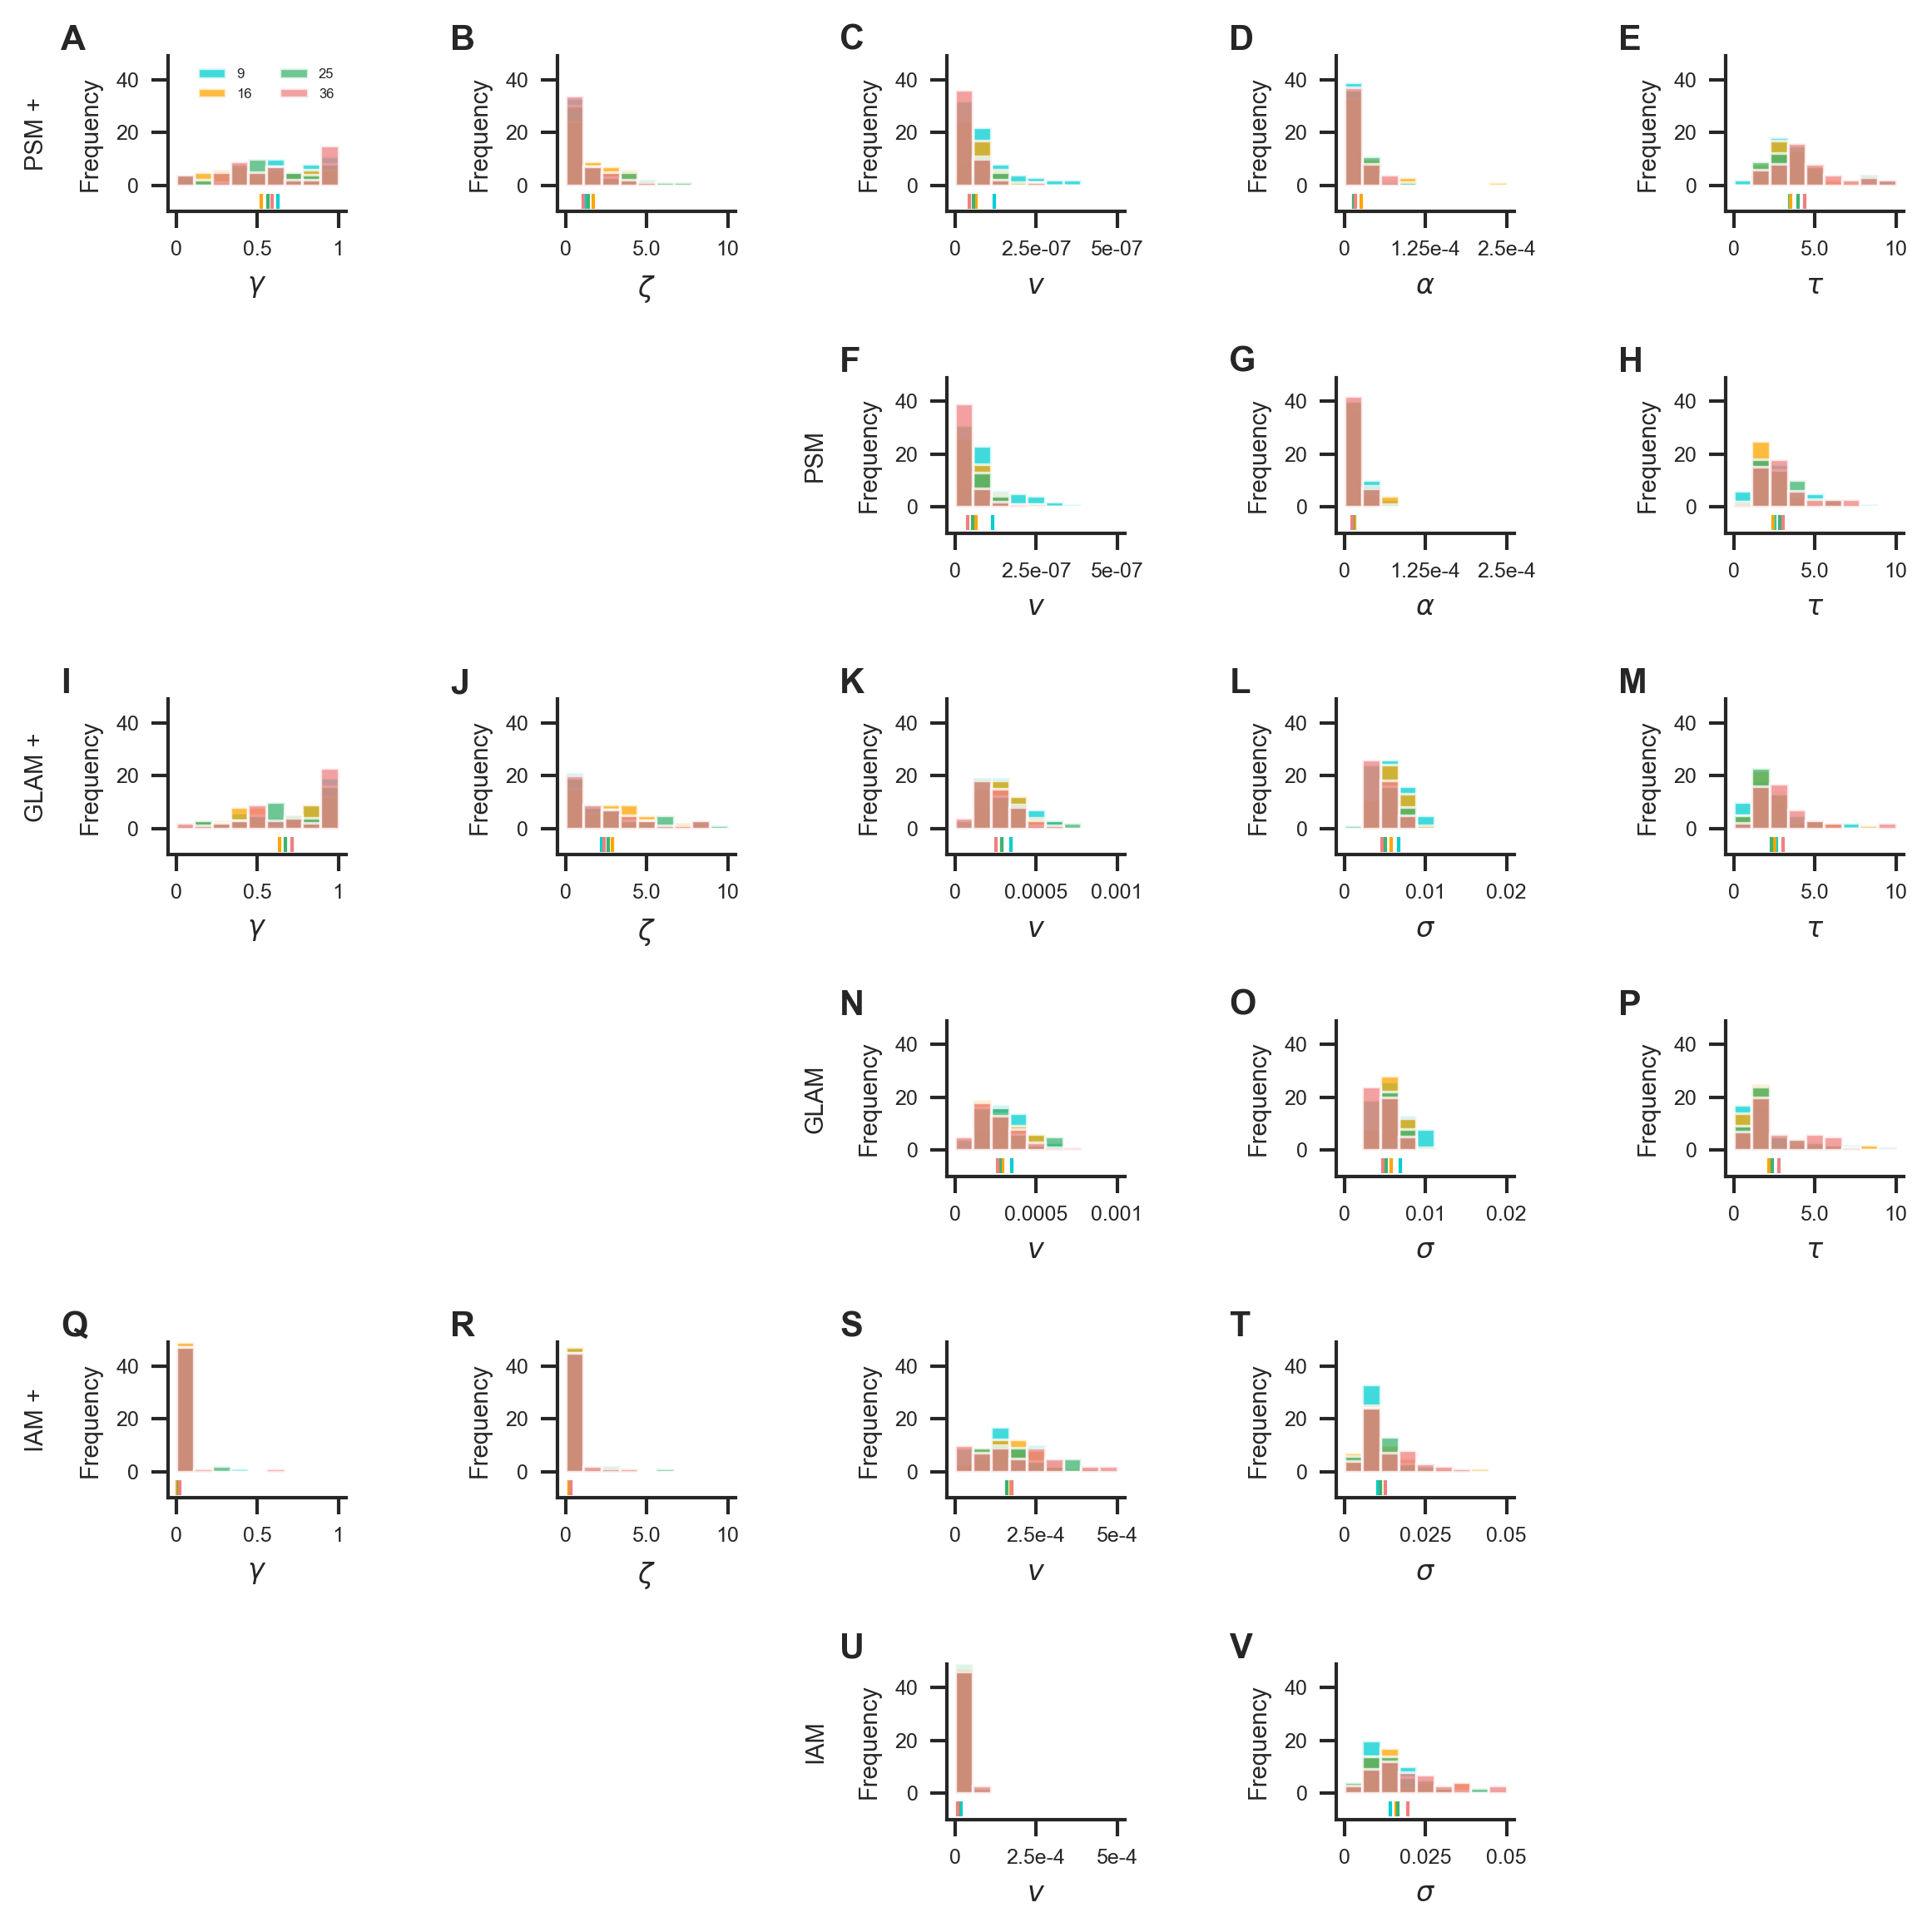

In [4]:
fig, axs = plt.subplots(6,5,figsize=cm2inch(20,20), dpi=300, sharey='row')

r = 0 # row index
for model_name, model_name_short in zip(model_names, model_names_short):
        
    # specify model parameters
    if model_name == 'independent_accumulation':
        model_parameters = ['gamma', 'zeta', 'v', 's']
        bins = [(0, 1), (0, 10), (0, 5e-4), (0, 0.05)]
    elif model_name == 'GLAM':
        model_parameters = ['gamma', 'zeta', 'v', 's', 'tau']
        bins = [(0, 1), (0, 10), (0, 1e-3), (0, 0.02), (0, 10)]
    elif model_name == 'probabilistic_satisficing':
        model_parameters = ['gamma', 'zeta', 'v', 'alpha', 'tau']
        bins = [(0, 1), (0, 10), (0, 5e-7), (0, 2.5e-4), (0, 10)]
    else:
        raise NameError('Invalid model name')
    
    for gaze_bias in gaze_biases:
        
        print('\n\n')
        model_key = '{}_{}'.format(model_name, gaze_bias)
        if 'active' in gaze_bias:
            title = model_name_short+' +' 
        else:
            title = model_name_short
        
        for si, setsize in enumerate(setsizes):
            print('\n')
        
            for c, (par, b) in enumerate(zip(model_parameters, bins)):
                
                if gaze_bias == 'with_passive_gaze' and par in ['gamma', 'zeta']:
                    try:
                        axs[r,c].remove()
                    except KeyError:
                        continue
                else:
                    # print mean estimate
                    print('{} (set size {}): {}, mean(sd): {}({})'.format(
                        model_key, setsize, par,
                        np.mean(np.array(estimates[model_key][setsize][par])),
                        np.std(np.array(estimates[model_key][setsize][par]))))
                    
                    # plot hist
                    axs[r,c].hist(np.array(estimates[model_key][setsize][par]),
                                    bins=np.linspace(*b, 10), color=colors[si],
                                    alpha=0.75, label=setsize)
                    # also plot mean
                    axs[r, c].scatter(np.mean(estimates[model_key][setsize][par]),
                                      -6, marker='|', s=20,  alpha=1, 
                                      color=colors[si], lw=1)
                    if par in ['gamma', 'zeta', 'tau', 'alpha']:
                        axs[r,c].set_xlabel(r"$\{}$".format(par), fontsize=8)
                    elif par == 's':
                        axs[r,c].set_xlabel(r"$\sigma$", fontsize=8)
                    else:
                        axs[r,c].set_xlabel(r"${}$".format(par), fontsize=8)
                    axs[r,c].set_xticks([b[0], b[1]/2., b[1]])
                    if 'alpha' in par:
                        axs[r,c].set_xticklabels(['0', '1.25e-4', '2.5e-4'])
                    elif 'v' in par and model_name == 'independent_accumulation':
                        axs[r,c].set_xticklabels(['0', '2.5e-4', '5e-4'])
                    else:
                        axs[r,c].set_xticklabels([b[0], b[1]/2., b[1]])
                    if 'active' in gaze_bias:
                        if c == 0:
                            axs[r,c].set_ylabel('{}\n\nFrequency'.format(title), fontsize=7)
                        else:
                            axs[r,c].set_ylabel('Frequency', fontsize=7)
                    else:
                        if c == 2:
                            axs[r,c].set_ylabel('{}\n\nFrequency'.format(title), fontsize=7)
                        else:
                            axs[r,c].set_ylabel('Frequency', fontsize=7)
        r += 1
        
# add legend
lgnd = axs[0,0].legend(fontsize=4, ncol=2, frameon=False)

# remove unused axes
axs[4,-1].remove()
axs[5,-1].remove()

# further plotting settings
for ax, label in zip(axs.ravel(), list('ABCDE  FGHIJKLM  NOPQRST   UV')):
    despine(ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.text(-0.6, 1.2, label, transform=ax.transAxes,
            fontsize=10, fontweight='bold', va='top')
    ax.set_ylim(-10, 49)

# save
fig.tight_layout()
fig.savefig(figure_dir+'Figure-5-figure-supplement-1_parameter-estimates.pdf', dpi=300)
fig.savefig(figure_dir+'Figure-5-figure-supplement-1_parameter-estimates.png', dpi=300)
fig.savefig(figure_dir+'Figure-5-figure-supplement-1_parameter-estimates.jpg', dpi=300)